In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/cosmetics.csv')

In [3]:
data.head()

,Unnamed: 0,category,url,brand,name,price,rating,skin_type,ingredients
0,0,beauty-complexion,https://en.zalando.de/darphin-melaperfect-foun...,Darphin,MELAPERFECT FOUNDATION NEUTRAL - Foundation,39.95,4.000000,NaN,"Water\aqua\eau, methyl, trimethicone, phenyl t..."
1,1,beauty-complexion,https://en.zalando.de/nyx-professional-makeup-...,Nyx Professional Makeup,HD PHOTOGENIC CONCEALER WAND - Concealer,6.95,4.143646,NaN,"AQUA / WATER, TRIMETHYLSILOXYPHENYL DIMETHICON..."
2,2,beauty-complexion,https://en.zalando.de/nyx-professional-makeup-...,Nyx Professional Makeup,BARE WITH ME TINTED SKIN VEIL - Setting spray ...,9.95,4.560000,NaN,"Aqua/Water/Eau, Glycerin, Alcohol Denat., Aloe..."
3,3,beauty-complexion,https://en.zalando.de/mac-prep--prime-fix--mat...,MAC,PREP + PRIME FIX + MATTIFYING MIST 100ML - Primer,22.50,4.327586,NaN,"Water\Aqua\Eau , Alcohol Denat. , Silica , Sod..."
4,4,beauty-complexion,https://en.zalando.de/mac-studio-fix-fluid-spf...,MAC,STUDIO FIX FLUID SPF15 FOUNDATION - Foundation,33.95,4.485348,NaN,"Octinoxate 2.50%, Titanium Dioxide 1.00%Water\..."


In [4]:
data.shape

(5392, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 9 columns):
Unnamed: 0     5392 non-null int64
category       5392 non-null object
url            5392 non-null object
brand          5029 non-null object
name           5029 non-null object
price          5029 non-null float64
rating         4212 non-null float64
skin_type      1886 non-null object
ingredients    4950 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 379.2+ KB


In [6]:
data.describe()

,Unnamed: 0,price,rating
count,5392.000000,5029.000000,4212.000000
mean,2695.500000,29.028837,4.261114
std,1556.680657,27.151732,0.675000
min,0.000000,5.950000,1.000000
25%,1347.750000,12.950000,3.967742
50%,2695.500000,19.950000,4.333334
75%,4043.250000,35.950000,4.800000
max,5391.000000,216.600000,5.000000


In [7]:
data.isnull().sum()/data.shape[0]*100

Unnamed: 0      0.000000
category        0.000000
url             0.000000
brand           6.732196
name            6.732196
price           6.732196
rating         21.884273
skin_type      65.022255
ingredients     8.197329
dtype: float64

In [8]:
data.columns

Index(['Unnamed: 0', 'category', 'url', 'brand', 'name', 'price', 'rating',
       'skin_type', 'ingredients'],
      dtype='object')

нужно удалить пустые значения:
- `Unnamed` не нужен
- `brand` и `name` и `price` около 300 (6.7%) значений без названия, не будем это хранить 

In [9]:
data = data.drop('Unnamed: 0', axis=1)

In [10]:
data.nunique()

category          3
url            1244
brand           116
name            766
price           125
rating          210
skin_type        24
ingredients     795
dtype: int64

In [11]:
data.duplicated(subset=['url','brand_name','name', 'price', 'rating']).value_counts()

False    2846
True     2546
dtype: int64

In [12]:
data.drop_duplicates(subset=['url','brand_name','name', 'price', 'rating'], keep = 'first', inplace=True)

In [13]:
data.shape

(2846, 8)

#### category

In [14]:
data.category.value_counts()

beauty-skincare-face     1311
beauty-sun-protection     851
beauty-complexion         684
Name: category, dtype: int64

категории надо сделать по проще

In [15]:
def get_category(line):
    result = ''
    if line == 'beauty-complexion':
        result = str('skin tone')
    elif line == 'beauty-sun-protection':
        result = str('sun protect')
    else:
        result = str('face care')
    return result

In [16]:
data['category'] = data['category'].apply(get_category)

#### url 

In [17]:
data = data.drop(['url'], axis=1)

#### name, brandname, price

In [18]:
data.name.isnull().sum()/data.shape[0]*100

1.1243851018973998

In [19]:
data.dropna(subset=['name'], inplace=True)

In [20]:
data.reset_index(drop=True, inplace=True)

In [21]:
data.tail()

,category,brand,name,price,rating,skin_type,ingredients
2809,sun protect,Institut Esthederm,Sun protection,50.73,NaN,Normal skin,"Aqua/Water/Eau*, Ethylhexyl Methoxycinnamate, ..."
2810,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE SILKY ...,44.46,NaN,Normal skin,"Butan, Dibutyl, Adipate, Coco-Caprylate/Caprat..."
2811,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE TANNIN...,46.74,NaN,Normal skin,"Aqua/water/eau*, Ethylhexyl Methoxycinnamate, ..."
2812,sun protect,Skin Stories,SKIN STORIES COLOR PROTECT SUN STICK - Sun pro...,14.95,NaN,All skin types,"C12-15 Alkyl Benzoate, Homosalate, Cera Alba, ..."
2813,sun protect,Institut Esthederm,Self tan,63.84,NaN,All skin types,"Aqua/Water/Eau*, Dicaprylyl Carbonate, Ethylex..."


#### rating

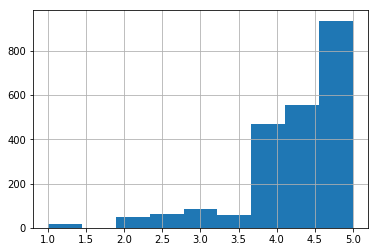

In [22]:
data['rating'].hist(bins=9);

In [23]:
data.rating.isnull().sum()

585

In [24]:
average_rating = data.rating.mean()

In [25]:
data.rating = data.rating.fillna(average_rating)

In [26]:
data.shape

(2814, 7)

In [27]:
data.tail()

,category,brand,name,price,rating,skin_type,ingredients
2809,sun protect,Institut Esthederm,Sun protection,50.73,4.269727,Normal skin,"Aqua/Water/Eau*, Ethylhexyl Methoxycinnamate, ..."
2810,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE SILKY ...,44.46,4.269727,Normal skin,"Butan, Dibutyl, Adipate, Coco-Caprylate/Caprat..."
2811,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE TANNIN...,46.74,4.269727,Normal skin,"Aqua/water/eau*, Ethylhexyl Methoxycinnamate, ..."
2812,sun protect,Skin Stories,SKIN STORIES COLOR PROTECT SUN STICK - Sun pro...,14.95,4.269727,All skin types,"C12-15 Alkyl Benzoate, Homosalate, Cera Alba, ..."
2813,sun protect,Institut Esthederm,Self tan,63.84,4.269727,All skin types,"Aqua/Water/Eau*, Dicaprylyl Carbonate, Ethylex..."


#### skin_type

In [28]:
data['skin_type'].value_counts()

All skin types                                                                        719
Normal skin                                                                           136
Sensitive skin                                                                        119
Dry skin                                                                               40
Oily skin                                                                              26
Mature skin                                                                            23
Combination skin                                                                       12
Dry skin, Sensitive skin, Combination skin, Oily skin, Normal skin                     11
Combination skin, Oily skin                                                             6
Dry skin, Combination skin, Oily skin                                                   5
Combination skin, Mature skin, Normal skin                                              2
Dry skin, 

In [29]:
data.tail()

,category,brand,name,price,rating,skin_type,ingredients
2809,sun protect,Institut Esthederm,Sun protection,50.73,4.269727,Normal skin,"Aqua/Water/Eau*, Ethylhexyl Methoxycinnamate, ..."
2810,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE SILKY ...,44.46,4.269727,Normal skin,"Butan, Dibutyl, Adipate, Coco-Caprylate/Caprat..."
2811,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE TANNIN...,46.74,4.269727,Normal skin,"Aqua/water/eau*, Ethylhexyl Methoxycinnamate, ..."
2812,sun protect,Skin Stories,SKIN STORIES COLOR PROTECT SUN STICK - Sun pro...,14.95,4.269727,All skin types,"C12-15 Alkyl Benzoate, Homosalate, Cera Alba, ..."
2813,sun protect,Institut Esthederm,Self tan,63.84,4.269727,All skin types,"Aqua/Water/Eau*, Dicaprylyl Carbonate, Ethylex..."


In [37]:
# make dummy columns for 7 different skin types
encoded = data['skin_type'].str.get_dummies(sep=', ')

In [38]:
encoded.tail()

,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
2809,0,0,0,0,1,0,0
2810,0,0,0,0,1,0,0
2811,0,0,0,0,1,0,0
2812,1,0,0,0,0,0,0
2813,1,0,0,0,0,0,0


In [39]:
data = pd.concat([data, encoded], axis=1)

In [41]:
data = data.drop('skin_type', axis = 1)

In [42]:
data.head()

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
0,skin tone,Darphin,MELAPERFECT FOUNDATION NEUTRAL - Foundation,39.95,4.000000,"Water\aqua\eau, methyl, trimethicone, phenyl t...",0,0,0,0,0,0,0
1,skin tone,Nyx Professional Makeup,HD PHOTOGENIC CONCEALER WAND - Concealer,6.95,4.143646,"AQUA / WATER, TRIMETHYLSILOXYPHENYL DIMETHICON...",0,0,0,0,0,0,0
2,skin tone,Nyx Professional Makeup,BARE WITH ME TINTED SKIN VEIL - Setting spray ...,9.95,4.560000,"Aqua/Water/Eau, Glycerin, Alcohol Denat., Aloe...",0,0,0,0,0,0,0
3,skin tone,MAC,PREP + PRIME FIX + MATTIFYING MIST 100ML - Primer,22.50,4.327586,"Water\Aqua\Eau , Alcohol Denat. , Silica , Sod...",0,0,0,0,0,0,0
4,skin tone,MAC,STUDIO FIX FLUID SPF15 FOUNDATION - Foundation,33.95,4.485348,"Octinoxate 2.50%, Titanium Dioxide 1.00%Water\...",0,0,0,0,0,0,0


#### ingredients
*some separators are - (dash), not comma*

In [45]:
data.isnull().sum()/data.shape[0]*100

category            0.000000
brand               0.000000
name                0.000000
price               0.000000
rating              0.000000
ingredients         2.061123
All skin types      0.000000
Combination skin    0.000000
Dry skin            0.000000
Mature skin         0.000000
Normal skin         0.000000
Oily skin           0.000000
Sensitive skin      0.000000
dtype: float64

In [47]:
data.tail()

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
2809,sun protect,Institut Esthederm,Sun protection,50.73,4.269727,"Aqua/Water/Eau*, Ethylhexyl Methoxycinnamate, ...",0,0,0,0,1,0,0
2810,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE SILKY ...,44.46,4.269727,"Butan, Dibutyl, Adipate, Coco-Caprylate/Caprat...",0,0,0,0,1,0,0
2811,sun protect,Institut Esthederm,INSTITUT ESTHEDERM ADAPTASUN PROTECTIVE TANNIN...,46.74,4.269727,"Aqua/water/eau*, Ethylhexyl Methoxycinnamate, ...",0,0,0,0,1,0,0
2812,sun protect,Skin Stories,SKIN STORIES COLOR PROTECT SUN STICK - Sun pro...,14.95,4.269727,"C12-15 Alkyl Benzoate, Homosalate, Cera Alba, ...",1,0,0,0,0,0,0
2813,sun protect,Institut Esthederm,Self tan,63.84,4.269727,"Aqua/Water/Eau*, Dicaprylyl Carbonate, Ethylex...",1,0,0,0,0,0,0


In [48]:
null_ingredients = data[data.isna().any(axis=1)]

In [51]:
null_ingredients.tail(10)

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
1487,face care,Pixi,SHEA BUTTER LIP BALM - Lip balm,10.95,3.967742,NaN,0,0,0,0,0,0,0
1491,face care,MAC,PRO PALETTE X 2 - Eye makeup tool,5.95,4.269727,NaN,0,0,0,0,0,0,0
1511,face care,Pixi,SHEA BUTTER LIP BALM - Lip balm,10.95,3.967742,NaN,0,0,0,0,0,0,0
1515,face care,MAC,PRO PALETTE X 2 - Eye makeup tool,5.95,4.269727,NaN,0,0,0,0,0,0,0
1530,face care,Pixi,SHEA BUTTER LIP BALM - Lip balm,10.95,3.967742,NaN,0,0,0,0,0,0,0
1533,face care,MAC,PRO PALETTE X 2 - Eye makeup tool,5.95,4.269727,NaN,0,0,0,0,0,0,0
1546,face care,Pixi,SHEA BUTTER LIP BALM - Lip balm,10.95,3.967742,NaN,0,0,0,0,0,0,0
1549,face care,MAC,PRO PALETTE X 2 - Eye makeup tool,5.95,4.269727,NaN,0,0,0,0,0,0,0
1598,face care,Pixi,SHEA BUTTER LIP BALM - Lip balm,10.95,3.967742,NaN,0,0,0,0,0,0,0
1602,face care,MAC,PRO PALETTE X 2 - Eye makeup tool,5.95,4.269727,NaN,0,0,0,0,0,0,0


* выходит без состава - декоративная косметика, типа тушь, бальзам для губ, и тп:`удаляем из датафрейма`. 

In [53]:
data.dropna(subset=['ingredients'], inplace=True)

In [54]:
data.reset_index(drop=True, inplace=True)

In [55]:
data.shape

(2756, 13)

##### Сохраняем обработанные поля для модели

In [56]:
data.to_csv('data/processed_cosmetics.csv', index=False)